<a href="https://colab.research.google.com/github/Ezra-Kaine/Statistics/blob/main/Advanced_Data_Transformation_and_Association_between_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

from google.colab import files
file=files.upload()

Saving Titanic Dataset.csv to Titanic Dataset (1).csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('Titanic Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,male


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  195 non-null    int64  
 1   Survived     195 non-null    int64  
 2   Pclass       195 non-null    int64  
 3   Name         195 non-null    object 
 4   Age          195 non-null    float64
 5   SibSp        195 non-null    int64  
 6   Parch        195 non-null    int64  
 7   Ticket       195 non-null    object 
 8   Fare         195 non-null    float64
 9   Cabin        39 non-null     object 
 10  Embarked     195 non-null    object 
 11  Gender       195 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.4+ KB


In [7]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,156


In [9]:
min_age=df['Age'].min()
max_age=df['Age'].max()
print(f"minimum age: {min_age}, \nmax age: {max_age}")

minimum age: 0.83, 
max age: 71.0


In [11]:
bins=[0,15,30,45,60,75]
df['binned_age']=pd.cut(df['Age'], bins)
print(df[['binned_age']].head())
age_labels=["Young",'Young Adults','Middle Aged','Middle Older Age','Senior']
df['binned_age']=pd.cut(df['Age'], bins, labels=age_labels)
print(df[['binned_age','Age']].head())

  binned_age
0   (15, 30]
1   (30, 45]
2   (15, 30]
3   (30, 45]
4   (30, 45]
     binned_age   Age
0  Young Adults  22.0
1   Middle Aged  38.0
2  Young Adults  26.0
3   Middle Aged  35.0
4   Middle Aged  35.0


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender,binned_age
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male,Young Adults
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female,Middle Aged
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Young Adults
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female,Middle Aged
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,male,Middle Aged


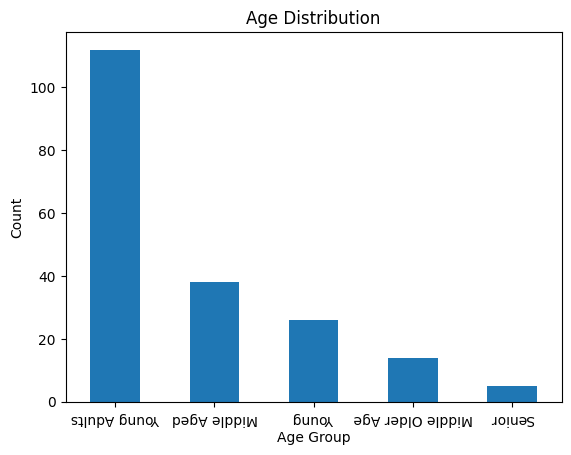

In [17]:
df['binned_age'].value_counts().plot(kind='bar')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tick_params(axis='x', rotation=180)
plt.show()